# **Scraping World's Top 250 Movie Data from IMDB**
*Using Requests, Beautiful Soup, Pandas*

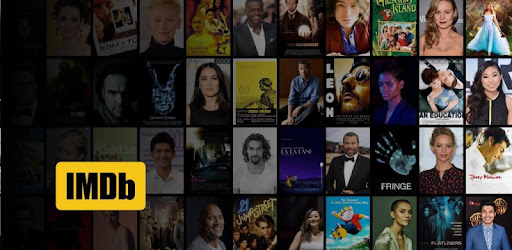

Index Of Contents
  * Introduction
    * Why I choose IMDb

    * What is Web Scraping? 
    * Libraries used for Web Scraping
  * Installing all the packages & Import to use
    
    * Jovian
    * Request
    * BeautifulSoup
    * Pandas

  * Download the web page using Requests
  * Extract the Information :
    * Movie Title
    * Cast
    * Movie Url
    * Release Year
    * Rating
    * Number of Reviews
    * Director
    * Lead Actors
    * Poster Image
    * Genre
    * Summary of Movies
  * Create a Dictionary of Items By Using all the Functions
  * Save the extracted information to a CSV file
  * Summary
  * Future Work
  * References
  * Follow me Here

## **Introduction**
Discovering what are some of the best movies now available is a challenging task in today's world. What are people saying about these films, and what makes them so enjoyable? This is a topic I frequently ask, and in order to alleviate some of the difficulty, I usually turn to the internet and look up some decent movies. The Internet Movie Database, or IMDB for short, is one of the most frequently visited websites. It's a database that's been there since 1990, and it's a site where you can get information about movies, TV series, and much more.



### **Why I choose IMDb**

One of the most significant features, in my opinion, is how their ratings are maintained. I enjoy watching movies as a hobby and have often questioned what constitutes a good film. What is it about certain movies that makes them appealing to users like myself? To have a better understanding of these questions, I decided to scrape the top rated movies on IMDB. Also The database included 8.7 million titles (including television episodes) and 11.4 million human records as of February 2022. There were also 83 million registered users on the site.

In addition to what was previously stated, In future I wanted to see what correlations exist between the data I collect, such as genre vs. gross, what trends can be drawn based on the data provided, and what might be some of the preferable genres, as well as whether the length of the movie has an effect on how much the user likes the movie.

### **What is WEB-SCRAPING**
Web scraping, also known as web harvesting or web data extraction, is a type of data scraping that is used to gather information from websites. Web scraping is the process of retrieving a web page and extracting information from it. Fetching is the process of downloading a webpage (which a browser does when a user views a page). As a result, web crawling is an important part of web scraping, as it allows you to collect pages for subsequent processing. After the data has been fetched, extraction can begin. A page's content can be analysed, searched, reformatted, and the data put into a spreadsheet or a database. Web scrapers often extract information from a page in order to use it for another purpose.

**Following is an example of what we'll be looking for and copying to a list.**
1.   Title of the movie
2.   Cast
3.   Movie Url
4.   Release Year
5.   Rating
6.   Number of Reviews
7.   Director
8.   Lead Actors
9.   Poster Image
10.  Genre
11.  Summary





### **Libraries used for Web Scraping**
As we all know, In Python there are different libraries for various purposes.we will be using the subsequent libraries:


*   **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: BeautifulSoup is a Python tool that allows you to parse HTML and XML texts. It generates parse trees, which are useful for quickly extracting information.
*   **[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)**: Pandas is a library that may be used to manipulate and analyse data. It is customary to extract data and save it in the desired format.
*   **[Requests](https://docs.python-requests.org/en/latest/)** :The requests module allows you to use Python to send HTTP requests. The response data from an HTTP request is returned as a Response Object (content, encoding, status, etc).








## Installing all the packages required & Import to use

### Downloading and importing Jovian

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('web-scrapping-project')
jovian.set_colab_id('1tR2z9EmI0TPZzoRSDL07wvWNFgf1M05h')

### Downloading and Importing Request

In [ ]:
!pip install requests --upgrade --quiet

In [ ]:
import requests

The Request library is now installed and imported.

### Downloading and Importing BeautifulSoup

In [ ]:
!pip install beautifulsoup4 --quiet --upgrade

In [ ]:
from bs4 import BeautifulSoup

The BeautifulSoup library is now installed and imported.

### Downloading and Importing Pandas

In [ ]:
!pip install pandas --quiet --upgrade

In [ ]:
import pandas as pd

The Pandas library is now installed and imported.

## Download the webpage using requests


In [ ]:
main_url = 'https://www.imdb.com/chart/top'

To download a page, we can use the get function from requests, which returns a response object.



In [ ]:
response = requests.get(main_url)

requests.get returns a response object containing the data from the web page and some other information.


In [ ]:
response.status_code 

200


The .status_code property can be used to check if the response was successful. A successful response will have an HTTP status code between 200 and 299.

In [ ]:
 #To know the length of the webpage
len(response.text) 

595179

In [ ]:
page_contents = response.text


In [ ]:
#first thousand characters of the webpage
page_contents[:1000]  

'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    \n    \n    \n\n    \n    \n    \n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 250 Movies - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n<

In the above cell page_content[:1000] contains the HTML of the webpage audible.in

We can also save it to a file and view the page locally within Colab using "File > Open".

In [ ]:
#Writing the html page to a file locally, i.e. a replica of real html page
with open('top_rated.html', 'w') as f:  
    f.write(page_contents)

## **Extracting the Information**

### Using Beautiful Soup to parse and extract information



In [ ]:
soup = BeautifulSoup(page_contents, 'html.parser')  #Now 'soup' contains entire html in parsed format

In [ ]:
type(soup)


bs4.BeautifulSoup

returns `.BeautifulSoup` type 

### Movie Name
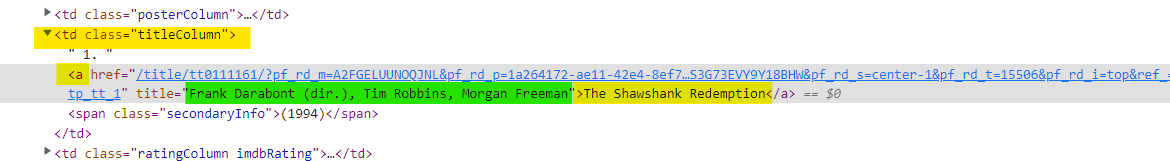

In [ ]:
#HERE we create a list of MOVIE NAMES 
parent = soup.find_all('td', {'class' : 'titleColumn'})
movie_names = []
cast = []
for item in parent:
    movie_names.append(item.find('a').text)
    cast.append(item.find('a')['title'])

### Movie Url
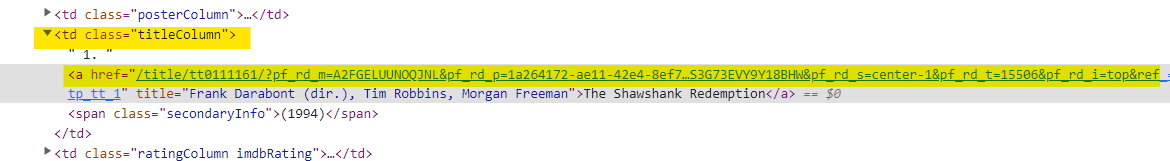

In [ ]:
#HERE we create a list of MOVIE URL 
movie_urls = []
base_url = 'https://www.imdb.com/'
for item in parent:
    a = item.find('a')
    movie_urls.append(base_url + item.find('a')['href'])
movie_urls[0]

'https://www.imdb.com//title/tt0111161/'

### Creating Dictionary

In [ ]:
# creating Dictionary 
movies_dict = {
    'Movie Name' : movie_names,
    'Cast' : cast,
    'Movie URLs' : movie_urls
}

In [ ]:
movies_df = pd.DataFrame(movies_dict)

In [ ]:
len(movies_df)

250

In [ ]:
movies_df[:-5]

,Movie Name,Cast,Movie URLs
0,The Shawshank Redemption,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",https://www.imdb.com//title/tt0111161/
1,The Godfather,"Francis Ford Coppola (dir.), Marlon Brando, Al...",https://www.imdb.com//title/tt0068646/
2,The Dark Knight,"Christopher Nolan (dir.), Christian Bale, Heat...",https://www.imdb.com//title/tt0468569/
3,The Godfather: Part II,"Francis Ford Coppola (dir.), Al Pacino, Robert...",https://www.imdb.com//title/tt0071562/
4,12 Angry Men,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",https://www.imdb.com//title/tt0050083/
...,...,...,...
240,La Haine,"Mathieu Kassovitz (dir.), Vincent Cassel, Hube...",https://www.imdb.com//title/tt0113247/
241,The Sound of Music,"Robert Wise (dir.), Julie Andrews, Christopher...",https://www.imdb.com//title/tt0059742/
242,It Happened One Night,"Frank Capra (dir.), Clark Gable, Claudette Col...",https://www.imdb.com//title/tt0025316/
243,The Handmaiden,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",https://www.imdb.com//title/tt4016934/


### Information From Movie Page
Using link extracted in above dictionary

In [ ]:
#To get information from the 1st movie among Most Popular Movies
movie_page = movie_urls[0]  

In [ ]:
movie_page


'https://www.imdb.com//title/tt0111161/'

In [ ]:
response = requests.get(movie_page)


In [ ]:
response.status_code


200

In [ ]:
len(response.text)


908703

In [ ]:
soup2 = BeautifulSoup(response.text, 'html.parser')

### Release Year
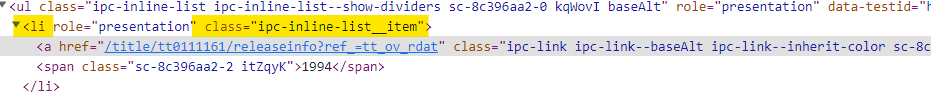

In [ ]:
year1 = soup2.find('li', class_="ipc-inline-list__item")  #To fetch the Release Year of the movie
print(year1)

<li class="ipc-inline-list__item" role="presentation"><a class="ipc-link ipc-link--baseAlt ipc-link--inherit-color sc-8c396aa2-1 WIUyh" href="/title/tt0111161/releaseinfo?ref_=tt_ov_rdat">1994</a><span class="sc-8c396aa2-2 itZqyK">1994</span></li>


In [ ]:
#This is the year when movie was released
year_of_release  = year1.a.text
year_of_release              

'1994'

### Rating 
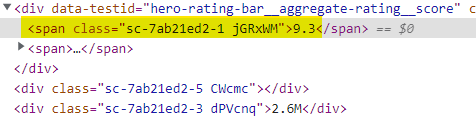

In [ ]:
#This is to fetch the rating of the movie
rating1 = soup2.find('span',class_='sc-7ab21ed2-1 jGRxWM')  
rating1

<span class="sc-7ab21ed2-1 jGRxWM">9.3</span>

In [ ]:
#This is the rating of the movie
if rating1 == None:
    rating = 'NA'
else: 
 rating = rating1.text
rating    

'9.3'

### Reviewer's : Number of reviews
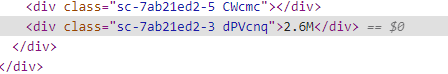

In [ ]:
#This is to get the number of people who reviewed the movie
reviewers1 = soup2.find('div',class_="sc-7ab21ed2-3 dPVcnq")   
reviewers1

<div class="sc-7ab21ed2-3 dPVcnq">2.6M</div>

In [ ]:
#This is the number of people who reviewed the movie
if reviewers1 == None:
    number_of_reviews = 'NA'
else :
 number_of_reviews = reviewers1.text
number_of_reviews    

'2.6M'

In [ ]:
names = soup2.find_all('ul', class_="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content baseAlt")
names

[<ul class="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content baseAlt" role="presentation"><li class="ipc-inline-list__item" role="presentation"><a class="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link" href="/name/nm0001104/?ref_=tt_ov_dr" rel="">Frank Darabont</a></li></ul>,
 <ul class="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content baseAlt" role="presentation"><li class="ipc-inline-list__item" role="presentation"><a class="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link" href="/name/nm0000175/?ref_=tt_ov_wr" rel="">Stephen King</a><span class="ipc-metadata-list-item__list-content-item--subText">(based on the short novel "Rita Hayworth and the Shawshank Redemption" by)</span></li><li class="ipc-inline-list__item" role="presentation"><a class="ipc-metadata-list-item__list-content-item

### Director Name
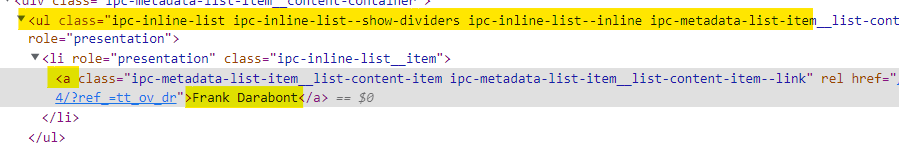

In [ ]:
#To fetch the director name
director = names[0].a.text  
director

'Frank Darabont'

### Lead Actor's
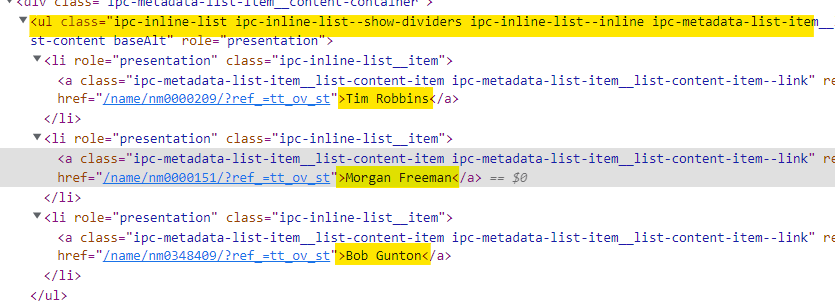

In [ ]:
#This is to fetch the Two lead actors in a movie
lead1 = names[2].find_all('a')   
lead = []  #This is the list of two lead actors in the movie
for item in range(len(lead1)):
    lead.append(lead1[item].text)
#Now Converting Python List into a String
    
# initializing delimiter 
delim = "|"
  
# join() used to join with delimiter
lead_actors = delim.join(lead)

print(lead_actors)

Tim Robbins|Morgan Freeman|Bob Gunton


### Poster URL 
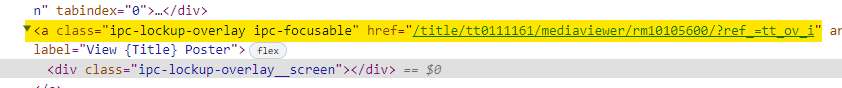

In [ ]:
#This is to find the image URL of movie poster
img = soup2.find('a', {'class' : 'ipc-lockup-overlay ipc-focusable'})  
image_url = base_url+img['href']
image_url

'https://www.imdb.com//title/tt0111161/mediaviewer/rm10105600/?ref_=tt_ov_i'

### Genre
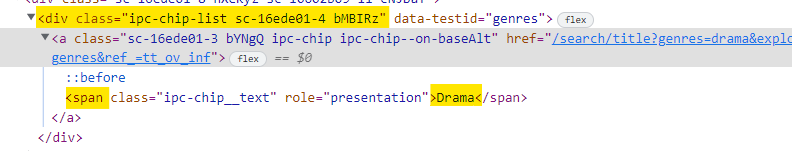

In [ ]:
 #This is to fetch the Genre of the movie
gen = soup2.find('div', class_=['ipc-chip-list sc-16ede01-4 bMBIRz','ipc-chip-list sc-16ede01-5 ggbGKe']) #  #Used two classes for fetching all records
b = gen.find_all('span')
genre1 = []            #This is a list of the Genre of the movie( Generally 3 genres are sepcified for each movie)
for item in range(len(b)):
    genre1.append(b[item].text) 
delim = "|"
genre = delim.join(genre1)  # -1 here is to not take the 'release date' along with the genre
genre

'Drama'

### Summary
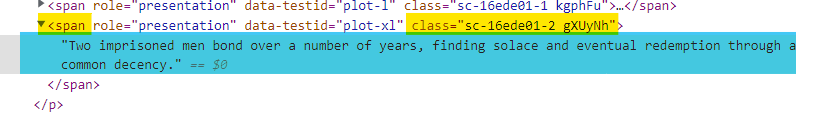

In [ ]:
 #This is to fetch the summary of the movie
summary = soup2.find('span', {'class' : 'sc-16ede01-2 gXUyNh'}) 
summary.text.strip()

'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

### Creating all helper function that gets you desired webpage by taking page number as argument



In [ ]:
def get_page_info(url):                  #This is the function to get BeautifulSoup object for any given URL
    page_url = url
    response = requests.get(page_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(page_url))
    # Parse the `response' text using BeautifulSoup
    soup2 = BeautifulSoup(response.text, 'html.parser')
    return soup2

def get_rating(page_info):
  rating1 = page_info.find('span',class_='sc-7ab21ed2-1 jGRxWM')        #Rating of the movie
  if rating1 == None:
    movie_rating_info = 'NA'
  else: 
    movie_rating_info = rating1.text
  return movie_rating_info

def get_reviewers(page_info):
  reviewers1 = page_info.find('div',class_="sc-7ab21ed2-3 dPVcnq")                #Number of reviews of the movie
  if reviewers1 == None:
    number_of_reviews_info = 'NA'
  else :
    number_of_reviews_info = reviewers1.text
  return number_of_reviews_info

def get_img_url(page_info):
  img = page_info.find('a', {'class' : 'ipc-lockup-overlay ipc-focusable'})  #This is to find the image URL of movie poster
  image_url_info = base_url+img['href']
  return image_url_info

def get_lead_actors(page_info):
  names = page_info.find_all('ul', class_="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content baseAlt")
  director = names[0].a.text    #Names of Director
  lead1 = names[2].find_all('a')   #This is to fetch the Two lead actors in a movie
  lead = []  #This is the list of two lead actors in the movie
  for item in range(len(lead1)):
    lead.append(lead1[item].text)
  #Now Converting Python List into a String
  delim = "|"    # initializing delimiter
  lead_actors_info = delim.join(lead)  # join() used to join with delimiter
  return director, lead_actors_info

def get_genre(page_info):
  gen = page_info.find('div', class_=['ipc-chip-list sc-16ede01-4 bMBIRz','ipc-chip-list sc-16ede01-5 ggbGKe'])  #This is to fetch the Genre of the movie
  b = gen.find_all('span')
  genre1 = []            #This is a list of the Genre of the movie( Generally 3 genres are sepcified for each movie)
  for item in range(len(b)):
      genre1.append(b[item].text) 
  delim = "|"
  genre_info = delim.join(genre1)  # -1 here is to not take the 'release date' along with the genre
  return genre_info

def get_summary(page_info):
  summary_info = page_info.find('span', {'class' : 'sc-16ede01-2 gXUyNh'}).text  #This is to fetch the summary of the movie
  return summary_info

def get_movie_info(movie_url):
    
    soup2 = get_page_info(movie_url)       #We call this function to get BeautifulSoup object for Movie URL in the argument
    year_of_release = soup2.find('li', class_="ipc-inline-list__item").a.text  #Year of release of the movie
    
    movie_rating = get_rating(soup2)
    number_of_reviews = get_reviewers(soup2)
    director = get_lead_actors(soup2)[0]
    lead_actors = get_lead_actors(soup2)[1]
    image_url = get_img_url(soup2)
    genre = get_genre(soup2)
    summary = get_summary(soup2)

    return year_of_release, movie_rating, number_of_reviews, director, lead_actors, image_url, genre, summary

In [ ]:
#To fetch all required information from 1st Movie URL
get_movie_info(movie_urls[46])  

('1962',
 '8.6',
 '54K',
 'Masaki Kobayashi',
 'Tatsuya Nakadai|Akira Ishihama|Shima Iwashita',
 'https://www.imdb.com//title/tt0056058/mediaviewer/rm3238815744/?ref_=tt_ov_i',
 'Action|Drama|Mystery',
 "When a ronin requesting seppuku at a feudal lord's palace is told of the brutal suicide of another ronin who previously visited, he reveals how their pasts are intertwined - and in doing so challenges the clan's integrity.")

In [ ]:
len(movie_urls)

250

### Create a Dictionary of Items By Using all the Functions
Now that we got all the items that we need from the website, Let's define a function that parses HTML code from range of web pages and assembles all the list of items together and access it like a dictionary.

In [ ]:
#Creating a dictionary for all the values that we have fetched from the webpage
movie_dict = {                  
    'year_of_release' : [],
    'movie_rating' : [],
    'number_of_reviews' : [],
    'director' : [],
    'lead_actors' : [],
    'image_url' : [],
    'genre' : [],
    'summary' : []
    
}

for movie in range(len(movie_urls)):               #To get the values for dictionary created above by calling get_movie_info function for all URLs
    details = get_movie_info(movie_urls[movie])
    movie_dict['year_of_release'].append(details[0])
    movie_dict['movie_rating'].append(details[1])
    movie_dict['number_of_reviews'].append(details[2])
    movie_dict['director'].append(details[3])
    movie_dict['lead_actors'].append(details[4])
    movie_dict['image_url' ].append(details[5])
    movie_dict['genre'].append(details[6])
    movie_dict['summary'].append(details[7])

In [ ]:
#Converting dictionary created from code above to a Dataframe
movie_details_df = pd.DataFrame(movie_dict)            

In [ ]:
movie_details_df


,year_of_release,movie_rating,number_of_reviews,director,lead_actors,image_url,genre,summary
0,1994,9.3,2.6M,Frank Darabont,Tim Robbins|Morgan Freeman|Bob Gunton,https://www.imdb.com//title/tt0111161/mediavie...,Drama,Two imprisoned men bond over a number of years...
1,1972,9.2,1.8M,Francis Ford Coppola,Marlon Brando|Al Pacino|James Caan,https://www.imdb.com//title/tt0068646/mediavie...,Crime|Drama,The aging patriarch of an organized crime dyna...
2,2008,9.0,2.5M,Christopher Nolan,Christian Bale|Heath Ledger|Aaron Eckhart,https://www.imdb.com//title/tt0468569/mediavie...,Action|Crime|Drama,When the menace known as the Joker wreaks havo...
3,1974,9.0,1.2M,Francis Ford Coppola,Al Pacino|Robert De Niro|Robert Duvall,https://www.imdb.com//title/tt0071562/mediavie...,Crime|Drama,The early life and career of Vito Corleone in ...
4,1957,9.0,762K,Sidney Lumet,Henry Fonda|Lee J. Cobb|Martin Balsam,https://www.imdb.com//title/tt0050083/mediavie...,Crime|Drama,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...
245,1992,8.0,402K,Ron Clements,Scott Weinger|Robin Williams|Linda Larkin,https://www.imdb.com//title/tt0103639/mediavie...,Animation|Adventure|Comedy,A kindhearted street urchin and a power-hungry...
246,2011,8.1,449K,Tate Taylor,Emma Stone|Viola Davis|Octavia Spencer,https://www.imdb.com//title/tt1454029/mediavie...,Drama,An aspiring author during the civil rights mov...
247,1991,8.0,441K,Gary Trousdale,Paige O'Hara|Robby Benson|Jesse Corti,https://www.imdb.com//title/tt0101414/mediavie...,Animation|Family|Fantasy,A prince cursed to spend his days as a hideous...
248,1955,8.1,34K,Jules Dassin,Jean Servais|Carl Möhner|Robert Manuel,https://www.imdb.com//title/tt0048021/mediavie...,Crime|Drama|Thriller,"Four men plan a technically perfect crime, but..."


In [ ]:
 #Merging the 1st Dataframe that we had created for Information from Most Popular Movies Page with the data frame now created which has all the information for each movie
df1 = movies_df
df2 = movie_details_df
final_df = pd.concat([df1,df2], axis = 1)   

In [ ]:
final_df

,Movie Name,Cast,Movie URLs,year_of_release,movie_rating,number_of_reviews,director,lead_actors,image_url,genre,summary
0,The Shawshank Redemption,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",https://www.imdb.com//title/tt0111161/,1994,9.3,2.6M,Frank Darabont,Tim Robbins|Morgan Freeman|Bob Gunton,https://www.imdb.com//title/tt0111161/mediavie...,Drama,Two imprisoned men bond over a number of years...
1,The Godfather,"Francis Ford Coppola (dir.), Marlon Brando, Al...",https://www.imdb.com//title/tt0068646/,1972,9.2,1.8M,Francis Ford Coppola,Marlon Brando|Al Pacino|James Caan,https://www.imdb.com//title/tt0068646/mediavie...,Crime|Drama,The aging patriarch of an organized crime dyna...
2,The Dark Knight,"Christopher Nolan (dir.), Christian Bale, Heat...",https://www.imdb.com//title/tt0468569/,2008,9.0,2.5M,Christopher Nolan,Christian Bale|Heath Ledger|Aaron Eckhart,https://www.imdb.com//title/tt0468569/mediavie...,Action|Crime|Drama,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,"Francis Ford Coppola (dir.), Al Pacino, Robert...",https://www.imdb.com//title/tt0071562/,1974,9.0,1.2M,Francis Ford Coppola,Al Pacino|Robert De Niro|Robert Duvall,https://www.imdb.com//title/tt0071562/mediavie...,Crime|Drama,The early life and career of Vito Corleone in ...
4,12 Angry Men,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",https://www.imdb.com//title/tt0050083/,1957,9.0,762K,Sidney Lumet,Henry Fonda|Lee J. Cobb|Martin Balsam,https://www.imdb.com//title/tt0050083/mediavie...,Crime|Drama,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...,...,...
245,Aladdin,"Ron Clements (dir.), Scott Weinger, Robin Will...",https://www.imdb.com//title/tt0103639/,1992,8.0,402K,Ron Clements,Scott Weinger|Robin Williams|Linda Larkin,https://www.imdb.com//title/tt0103639/mediavie...,Animation|Adventure|Comedy,A kindhearted street urchin and a power-hungry...
246,The Help,"Tate Taylor (dir.), Emma Stone, Viola Davis",https://www.imdb.com//title/tt1454029/,2011,8.1,449K,Tate Taylor,Emma Stone|Viola Davis|Octavia Spencer,https://www.imdb.com//title/tt1454029/mediavie...,Drama,An aspiring author during the civil rights mov...
247,Beauty and the Beast,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",https://www.imdb.com//title/tt0101414/,1991,8.0,441K,Gary Trousdale,Paige O'Hara|Robby Benson|Jesse Corti,https://www.imdb.com//title/tt0101414/mediavie...,Animation|Family|Fantasy,A prince cursed to spend his days as a hideous...
248,Rififi,"Jules Dassin (dir.), Jean Servais, Carl Möhner",https://www.imdb.com//title/tt0048021/,1955,8.1,34K,Jules Dassin,Jean Servais|Carl Möhner|Robert Manuel,https://www.imdb.com//title/tt0048021/mediavie...,Crime|Drama|Thriller,"Four men plan a technically perfect crime, but..."


## Save the extracted information to a CSV file

We've scraped 10 columns and 250 rows. Let's write all the data collected in a CSV file.

In [ ]:
 #Converting the final Dataframe to a CSV File
final_df.to_csv('top_rated_movies.csv', index=None)    

In [ ]:
final_df.head()


,Movie Name,Cast,Movie URLs,year_of_release,movie_rating,number_of_reviews,director,lead_actors,image_url,genre,summary
0,The Shawshank Redemption,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",https://www.imdb.com//title/tt0111161/,1994,9.3,2.6M,Frank Darabont,Tim Robbins|Morgan Freeman|Bob Gunton,https://www.imdb.com//title/tt0111161/mediavie...,Drama,Two imprisoned men bond over a number of years...
1,The Godfather,"Francis Ford Coppola (dir.), Marlon Brando, Al...",https://www.imdb.com//title/tt0068646/,1972,9.2,1.8M,Francis Ford Coppola,Marlon Brando|Al Pacino|James Caan,https://www.imdb.com//title/tt0068646/mediavie...,Crime|Drama,The aging patriarch of an organized crime dyna...
2,The Dark Knight,"Christopher Nolan (dir.), Christian Bale, Heat...",https://www.imdb.com//title/tt0468569/,2008,9.0,2.5M,Christopher Nolan,Christian Bale|Heath Ledger|Aaron Eckhart,https://www.imdb.com//title/tt0468569/mediavie...,Action|Crime|Drama,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,"Francis Ford Coppola (dir.), Al Pacino, Robert...",https://www.imdb.com//title/tt0071562/,1974,9.0,1.2M,Francis Ford Coppola,Al Pacino|Robert De Niro|Robert Duvall,https://www.imdb.com//title/tt0071562/mediavie...,Crime|Drama,The early life and career of Vito Corleone in ...
4,12 Angry Men,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",https://www.imdb.com//title/tt0050083/,1957,9.0,762K,Sidney Lumet,Henry Fonda|Lee J. Cobb|Martin Balsam,https://www.imdb.com//title/tt0050083/mediavie...,Crime|Drama,The jury in a New York City murder trial is fr...


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="web-scraping-top-movies-IMDb")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dwivedi-amo/web-scraping-top-movies-imdb


'https://jovian.ai/dwivedi-amo/web-scraping-top-movies-imdb'

## **Summary**

Here's an overview of scraping data from IMDb:

* We downloaded the IMDb website using the requests library.

* We parsed the page's HTML source code using the Beautiful Soup library.

* We extracted **250 rows** and **11 columns** i.e. movie names, cast, movie url, release year, rating, number of reviews, director, lead actors, poster,  genre and summary by **joining two files**.

* We compiled the data, created a Pandas data frame, and saved it to a CSV file.

## **Future Work**

Here are some ways in which the project can be extended:

* We have parsed only movies which have been released, the code can be reused to parse the film, which may get released later.

* We can scrape for TV Shows as we did for movies.
* To extend this project, will be doing Exploratory data analysis(EDA) on this dataset.

## **References**

* [Let's build a Python Web Scraping Project from Scratch](https://jovian.ai/aakashns/python-web-scraping-project-guide)
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* https://docs.python-requests.org/en/master/ 
* [Zero to data Science Bootcamp: Jovian](https://www.youtube.com/channel/UCmKaoNn0OvxVAe7f_8sXYNQ)

## Follow Me here
 - [LinkedIn](https://www.linkedin.com/in/amrit6d/)
 - [GitHub](https://github.com/damriteshwar)
 - [Medium](https://medium.com/@dwivedi.amo)
 - [Facebook](https://www.facebook.com/amriteshwar29/)
 - [Instagram](https://www.instagram.com/d.amodo/)